In [45]:
#install / import the libraries 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')




In [104]:
#read the data in 
LBS=pd.read_csv('HistoricalData_Lumber.csv').dropna().sort_index()
#LBS['Date'].sort_index()
# LBS['Date'].sort_values(ascending=True)
# LBS['Close/Last'].sort_values(ascending=False)
# LBS['Volume'].sort_values(ascending=False)
# LBS['Open'].sort_values(ascending=False)
# LBS['High'].sort_values(ascending=False)
# LBS['Low'].sort_values(ascending=False)
LBS.head(6)

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2022,889.0,160.0,880.3,904.8,862.1
1,04/13/2022,883.7,177.0,876.6,902.5,844.8
2,04/12/2022,874.2,244.0,862.0,890.0,829.3
3,04/11/2022,886.3,229.0,971.1,992.6,870.0
4,04/08/2022,949.9,242.0,891.0,949.9,890.0
5,04/07/2022,892.9,349.0,864.9,896.7,846.7


In [106]:
# #store the data into a data frame
LBS = pd.read_csv('HistoricalData_Lumber.csv')
LBS.head(6)

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2022,889.0,160.0,880.3,904.8,862.1
1,04/13/2022,883.7,177.0,876.6,902.5,844.8
2,04/12/2022,874.2,244.0,862.0,890.0,829.3
3,04/11/2022,886.3,229.0,971.1,992.6,870.0
4,04/08/2022,949.9,242.0,891.0,949.9,890.0
5,04/07/2022,892.9,349.0,864.9,896.7,846.7


In [107]:
# get the number of trading day in the dataset
LBS.shape


(2551, 6)

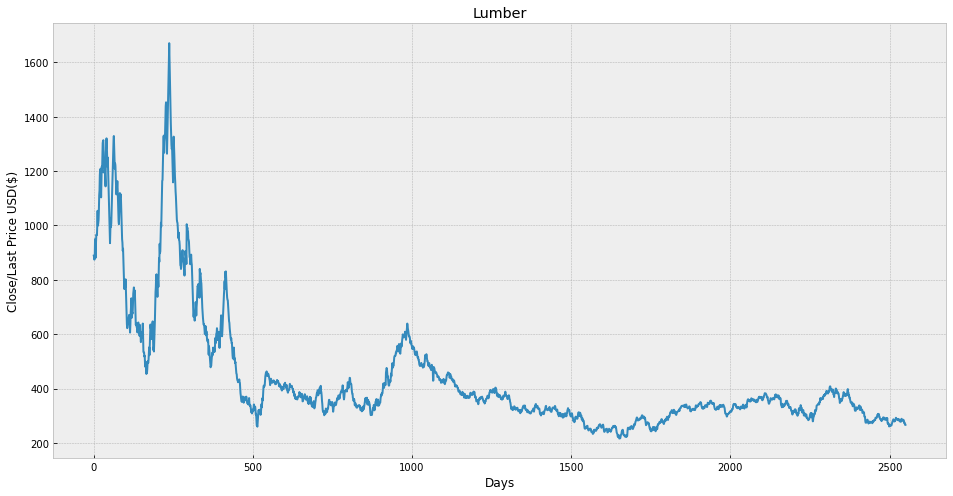

In [108]:
#Visulaze the close/last price data 
plt.figure(figsize=(16,8))
plt.title('Lumber')
plt.xlabel('Days')
plt.ylabel('Close/Last Price USD($)')
plt.plot(LBS['Close/Last'])
plt.show()

In [109]:
# Get the Close/Last price new data frame
LBS = LBS[['Close/Last']]
LBS.head(4)

,Close/Last
0,889.0
1,883.7
2,874.2
3,886.3


In [167]:
#Create a variable to predicte the x  days in the futrue
future_days = 1000
#Create a new column (target) shifted x units/days up
LBS['Prediction'] = LBS[['Close/Last']].shift(-future_days)
LBS.head(4)


,Close/Last,Prediction
0,889.0,552.2
1,883.7,545.4
2,874.2,556.6
3,886.3,546.7


In [168]:
# create the feature data set x and convert it to a numpy array and remove the last 'x' rows/days 
X = np.array(LBS.drop(['Prediction'], 1))[:-future_days]
print(X)

[[889. ]
 [883.7]
 [874.2]
 ...
 [259.9]
 [262. ]
 [262.6]]


C:\Users\Amazi\AppData\Local\Temp/ipykernel_12012/222410185.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(LBS.drop(['Prediction'], 1))[:-future_days]


In [169]:
#Create the target data set convert it to a numpy array and get  all of the target vlaues except the last x rows 
y= np.array(LBS['Prediction'])[:-future_days]
print(y)

[552.2 545.4 556.6 ... 271.5 266.5 266.5]


In [170]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [171]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [172]:
#Get the last x rows of the data set 
x_future = LBS.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\Amazi\AppData\Local\Temp/ipykernel_12012/3083810048.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = LBS.drop(['Prediction'], 1)[:-future_days]


array([[440.2],
       [433.2],
       [428.3],
       [412.7],
       [422.8],
       [435.5],
       [436.1],
       [428. ],
       [427.1],
       [420.8],
       [426.2],
       [426. ],
       [425.2],
       [424.7],
       [430. ],
       [428.8],
       [426.5],
       [420.4],
       [422.6],
       [416.2],
       [416. ],
       [422.9],
       [418.3],
       [420.5],
       [427.6],
       [431.8],
       [426.2],
       [427.8],
       [427.9],
       [422.3],
       [420.9],
       [408.6],
       [413.3],
       [417.2],
       [406.8],
       [406.4],
       [410.8],
       [404.6],
       [397.8],
       [396.6],
       [392.7],
       [399.4],
       [406.1],
       [405.3],
       [400.7],
       [397.8],
       [409. ],
       [416.6],
       [416.1],
       [412.9],
       [421.3],
       [410.4],
       [408.2],
       [402.7],
       [413.4],
       [413. ],
       [396.4],
       [398.7],
       [387.9],
       [384.8],
       [391.7],
       [393. ],
       [

In [173]:
#show the model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()


[263.1        338.6        249.3        287.55       245.9
 364.8        250.7        251.4        252.8        369.
 245.         248.7        240.9        240.4        241.6
 242.7        348.         281.75       234.4        299.
 238.4        248.4        245.8        248.6        247.6
 367.2        245.         247.1        246.1        368.6
 255.9        253.         256.1        263.7        314.7
 259.5        332.1        296.3        262.15       268.8
 268.1        266.4        260.9        239.2        255.9
 262.15       260.8        263.7        264.8        267.4
 307.7        314.7        244.9        240.8        241.7
 245.8        247.4        250.         250.         248.6
 283.2        307.7        243.3        247.4        239.2
 263.7        287.55       260.9        252.2        247.85
 245.3        247.85       296.3        241.         274.
 246.1        251.5        280.         256.7        255.
 257.1        262.5        284.575      342.9        284.95

C:\Users\Amazi\AppData\Local\Temp/ipykernel_12012/533861742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


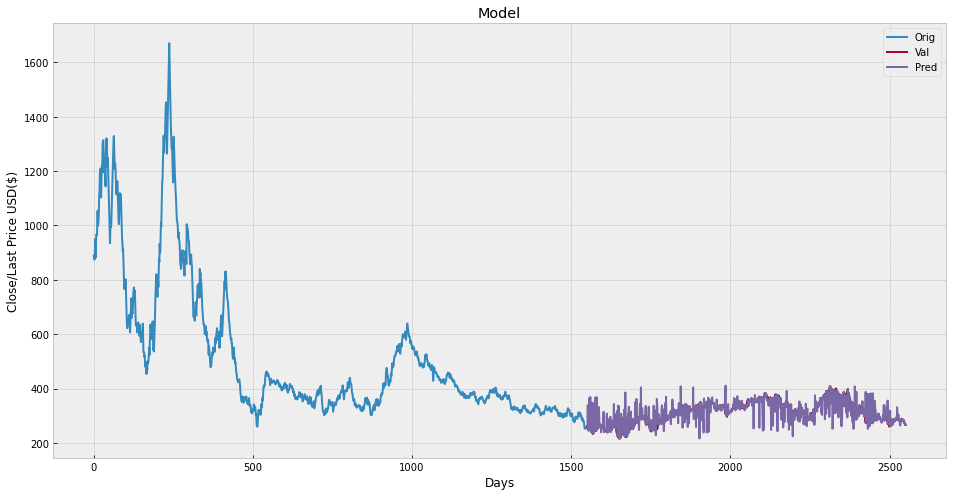

In [174]:
#Visualize the data
predictions = tree_prediction

valid =LBS[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close/Last Price USD($)')
plt.plot(LBS['Close/Last'])
plt.plot(valid[['Close/Last', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()